<a href="https://colab.research.google.com/github/amyrhuerta/Regresion-Lineal/blob/main/Actividad_6_1_(Regresi%C3%B3n_Lineal_Simple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 6.1 (Regresión Lineal Simple)
Amairany Rodríguez | a01702927

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# declaramos nuestros dataframes
dfeua=pd.read_csv("dfeua SIN NULOS.csv")
dfmex=pd.read_csv("dfmex SIN NULOS.csv")
dfg=pd.read_csv("dfg SIN NULOS.csv", encoding= 'unicode_escape')

In [ ]:
dfeua['host_acceptance_rate'] = dfeua['host_acceptance_rate'].str.replace('%', '')
dfeua['host_acceptance_rate'] = dfeua['host_acceptance_rate'].str.replace('sin información', '0')

dfmex['host_acceptance_rate'] = dfmex['host_acceptance_rate'].str.replace('%', '')
dfmex['host_acceptance_rate'] = dfmex['host_acceptance_rate'].str.replace('sin información', '0')

dfg['host_acceptance_rate'] = dfg['host_acceptance_rate'].str.replace('%', '')
dfg['host_acceptance_rate'] = dfg['host_acceptance_rate'].str.replace('sin información', '0')

In [ ]:
dfeua['host_response_rate'] = dfeua['host_response_rate'].str.replace('%', '')
dfeua['host_response_rate'] = dfeua['host_response_rate'].str.replace('sin información', '0')

dfmex['host_response_rate'] = dfmex['host_response_rate'].str.replace('%', '')
dfmex['host_response_rate'] = dfmex['host_response_rate'].str.replace('sin información', '0')

dfg['host_response_rate'] = dfg['host_response_rate'].str.replace('%', '')
dfg['host_response_rate'] = dfg['host_response_rate'].str.replace('sin información', '0')

In [ ]:
dfeua['price'] = dfeua['price'].str.replace('$', '')
dfeua['price'] = dfeua['price'].str.replace(',', '')

dfmex['price'] = dfmex['price'].str.replace('$', '')
dfmex['price'] = dfmex['price'].str.replace(',', '')

dfg['price'] = dfg['price'].str.replace('$', '')
dfg['price'] = dfg['price'].str.replace(',', '')

# DF mex

In [ ]:
fprivate = dfmex['room_type'].str.contains('Private room')
df_filtrado1 = dfmex[fprivate]

fhotel = dfmex['room_type'].str.contains('Hotel room')
df_filtrado2 = dfmex[fprivate]

## “host_acceptance_rate vs host_response_rate” F1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado1[['host_acceptance_rate']]
Var_Dep= df_filtrado1['host_response_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.68802204]),
 'rank_': 1,
 'singular_': array([3322.42400281]),
 'intercept_': 21.454401879390645}

Modelo matemático: y= 0.68802204 x + 21.45440

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.3824069659528214

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

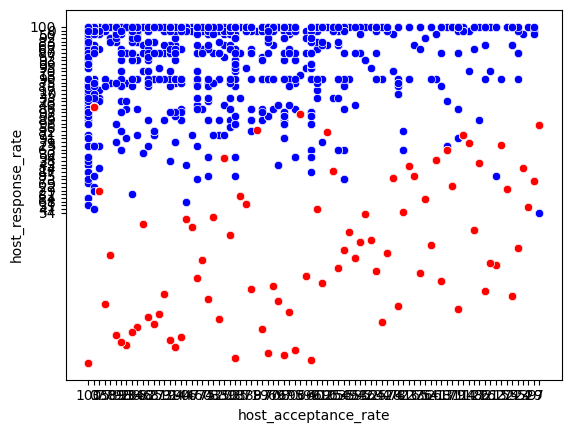

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado1[['host_acceptance_rate']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.3824069659528214

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-74-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “host_acceptance_rate vs host_response_rate” F2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado2[['host_acceptance_rate']]
Var_Dep= df_filtrado2['host_response_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.68802204]),
 'rank_': 1,
 'singular_': array([3322.42400281]),
 'intercept_': 21.454401879390645}

Modelo matemático: y= 0.68802204 x + 21.45440

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.3824069659528214

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

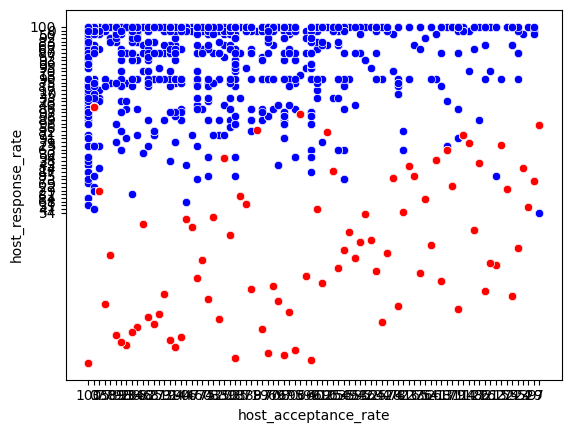

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado2[['host_acceptance_rate']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado2.insert(0, 'Predicciones', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.3824069659528214

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-59-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “host_acceptance_rate vs price” F1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado1[['host_acceptance_rate']]
Var_Dep= df_filtrado1['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-14.79683512]),
 'rank_': 1,
 'singular_': array([3322.42400281]),
 'intercept_': 2651.332071166209}

Modelo matemático: y= -14.79683512 x + 2651.332071166209

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0005176144732653709

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

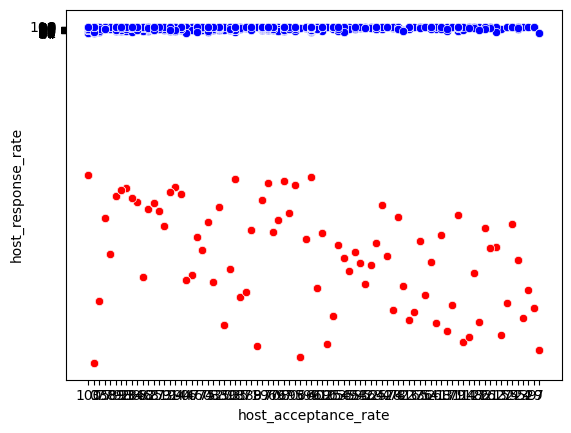

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado1[['host_acceptance_rate']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones1', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones1', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.0005176144732653709

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-81-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “host_acceptance_rate vs price” F2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado2[['host_acceptance_rate']]
Var_Dep= df_filtrado2['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-14.79683512]),
 'rank_': 1,
 'singular_': array([3322.42400281]),
 'intercept_': 2651.332071166209}

Modelo matemático: y= -14.79683512 x + 2651.332071166209

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0005176144732653709

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

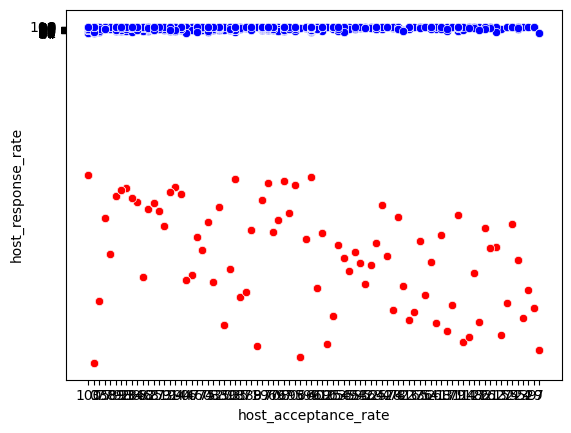

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado2[['host_acceptance_rate']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones2', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.0005176144732653709

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-88-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “host_acceptance_rate vs number_of_reviews” F1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado1[['host_acceptance_rate']]
Var_Dep= df_filtrado1['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.25069874]),
 'rank_': 1,
 'singular_': array([3322.42400281]),
 'intercept_': 6.510846591759165}

Modelo matemático: y= 0.25069874 x + 6.510846591759165

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.025621035420213212

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

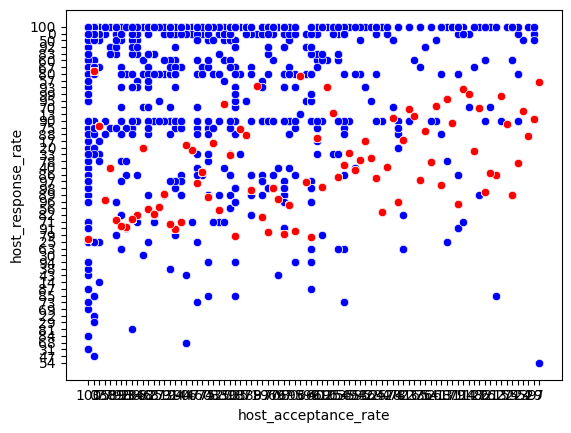

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado1[['host_acceptance_rate']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones3', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.025621035420213212

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-94-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “host_acceptance_rate vs number_of_reviews” F2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado2[['host_acceptance_rate']]
Var_Dep= df_filtrado2['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.25069874]),
 'rank_': 1,
 'singular_': array([3322.42400281]),
 'intercept_': 6.510846591759165}

Modelo matemático: y= 0.25069874 x + 6.510846591759165

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.025621035420213212

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

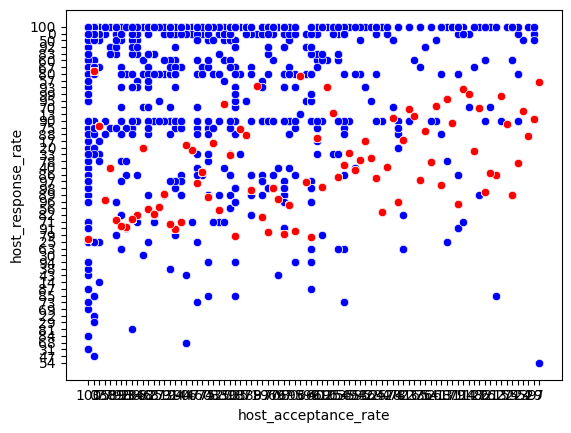

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado2[['host_acceptance_rate']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones4', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones4', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.025621035420213212

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-101-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “review_scores_location vs review_scores_cleanliness” F1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado1[['review_scores_location']]
Var_Dep= df_filtrado1['review_scores_cleanliness']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.97198973]),
 'rank_': 1,
 'singular_': array([184.5893326]),
 'intercept_': 0.023999694797386617}

Modelo matemático: y= 0.97198973 x + 0.023999694797386617

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.025621035420213212

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

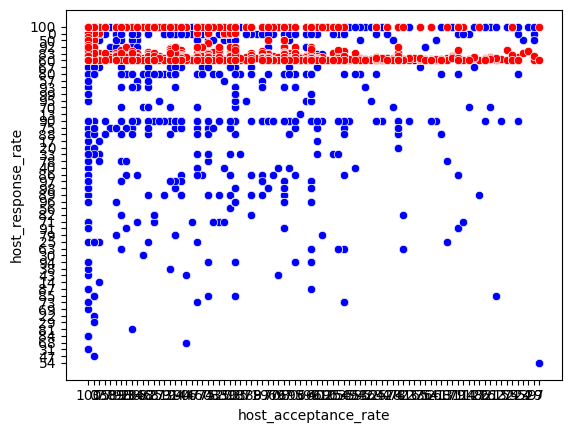

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado1[['review_scores_location']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones5', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones5', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.9723502509422889

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-107-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “review_scores_location vs review_scores_cleanliness” F2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado2[['review_scores_location']]
Var_Dep= df_filtrado2['review_scores_cleanliness']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.97198973]),
 'rank_': 1,
 'singular_': array([184.5893326]),
 'intercept_': 0.023999694797386617}

Modelo matemático: y= 0.97198973 x + 0.023999694797386617

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.9723502509422889

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

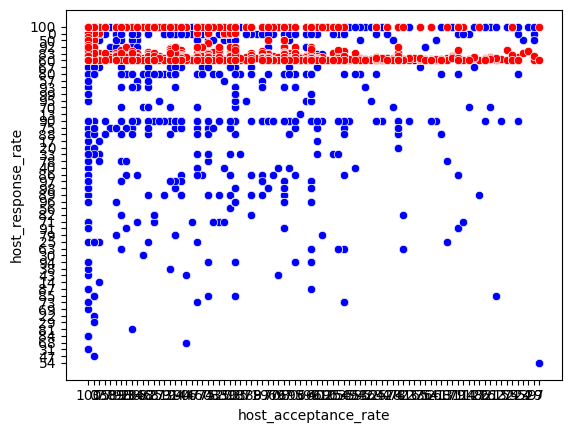

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado2[['review_scores_location']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones6', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones6', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.9723502509422889

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-113-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


##"availability_365 vs number_of_reviews” F1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado1[['availability_365']]
Var_Dep= df_filtrado1['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.01974192]),
 'rank_': 1,
 'singular_': array([11333.32566802]),
 'intercept_': 30.875619771587434}

Modelo matemático: y= -0.01974192 x + 30.875619771587434

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.001848740094272161

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

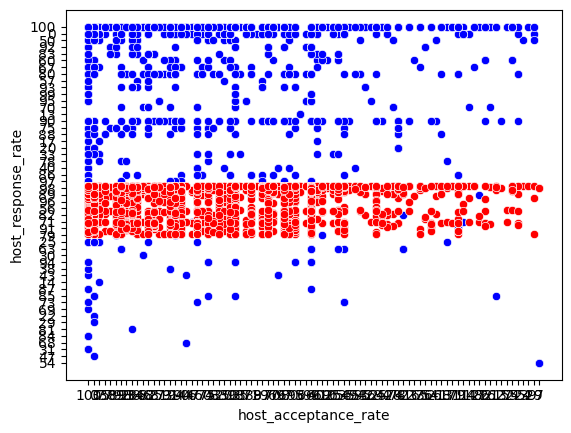

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado1[['availability_365']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones7', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones7', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.001848740094272161

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-120-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


##"availability_365 vs number_of_reviews” F2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado2[['availability_365']]
Var_Dep= df_filtrado2['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.01974192]),
 'rank_': 1,
 'singular_': array([11333.32566802]),
 'intercept_': 30.875619771587434}

Modelo matemático: y= -0.01974192 x + 30.875619771587434

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.001848740094272161

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

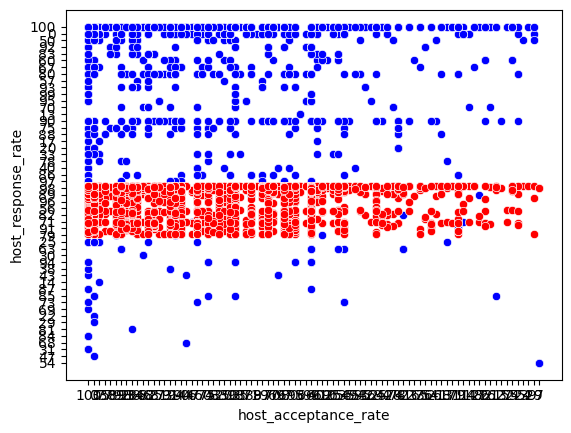

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado2[['availability_365']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones8', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones8', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.001848740094272161

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-126-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## "reviews_per_month vs review_scores_communication” F1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado1[['reviews_per_month']]
Var_Dep= df_filtrado1['review_scores_communication']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.29302237]),
 'rank_': 1,
 'singular_': array([178.11852283]),
 'intercept_': 3.418693800168787}

Modelo matemático: y= 0.29302237 x + 3.418693800168787

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.08013727168058526

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

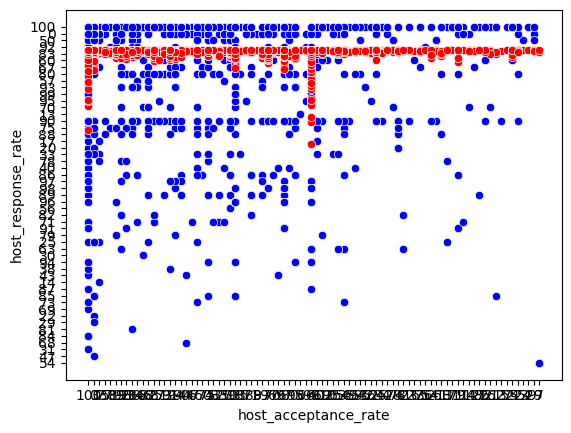

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado1[['reviews_per_month']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones9', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones9', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.08013727168058526

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-133-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## "reviews_per_month vs review_scores_communication” F2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado2[['reviews_per_month']]
Var_Dep= df_filtrado2['review_scores_communication']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.29302237]),
 'rank_': 1,
 'singular_': array([178.11852283]),
 'intercept_': 3.418693800168787}

Modelo matemático: y= 0.29302237 x + 3.418693800168787

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.08013727168058526

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

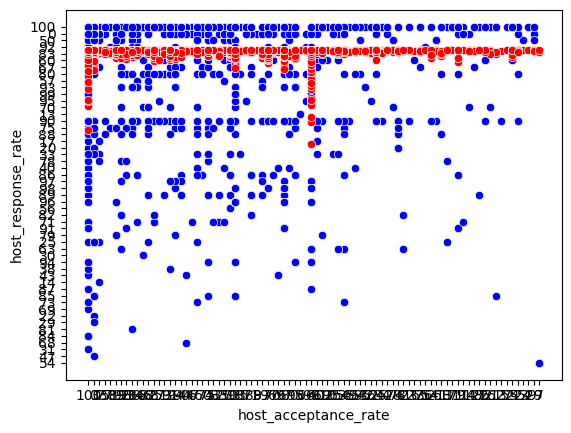

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado2[['reviews_per_month']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones10', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones10', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.08013727168058526

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-139-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


# DF eua

In [ ]:
fprivate = dfeua['room_type'].str.contains('Private room')
df_filtrado1 = dfeua[fprivate]

fhotel = dfeua['room_type'].str.contains('Hotel room')
df_filtrado2 = dfeua[fprivate]

## “host_acceptance_rate vs host_response_rate” F1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado1[['host_acceptance_rate']]
Var_Dep= df_filtrado1['host_response_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.81233187]),
 'rank_': 1,
 'singular_': array([1772.83137194]),
 'intercept_': 15.833151393273454}

Modelo matemático: y= 0.81233187 x + 15.833151393273454

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.596324399814793

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

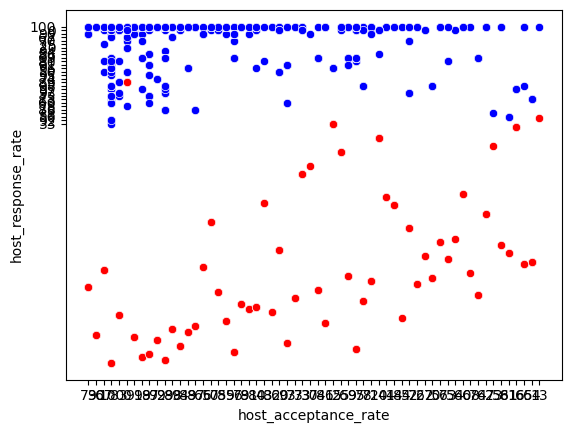

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado1[['host_acceptance_rate']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.596324399814793

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-151-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “host_acceptance_rate vs host_response_rate” F2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado2[['host_acceptance_rate']]
Var_Dep= df_filtrado2['host_response_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.81233187]),
 'rank_': 1,
 'singular_': array([1772.83137194]),
 'intercept_': 15.833151393273454}

Modelo matemático: y= 0.81233187 x + 15.833151393273454

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.596324399814793

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

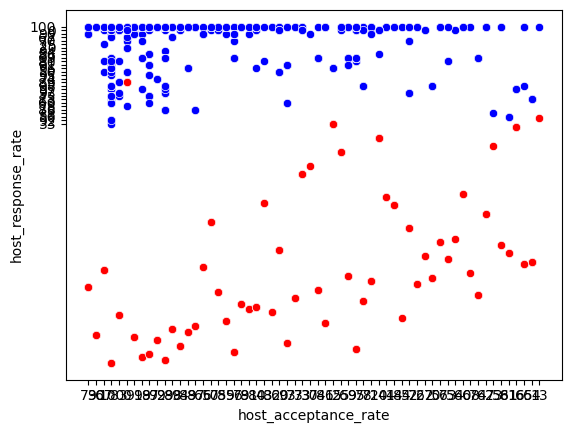

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado2[['host_acceptance_rate']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado2.insert(0, 'Predicciones', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.596324399814793

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-157-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “host_acceptance_rate vs price” F1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado1[['host_acceptance_rate']]
Var_Dep= df_filtrado1['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.38559217]),
 'rank_': 1,
 'singular_': array([1772.83137194]),
 'intercept_': 536.7903907523971}

Modelo matemático: y= -1.38559217 x + 536.7903907523971

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0006379781398160311

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

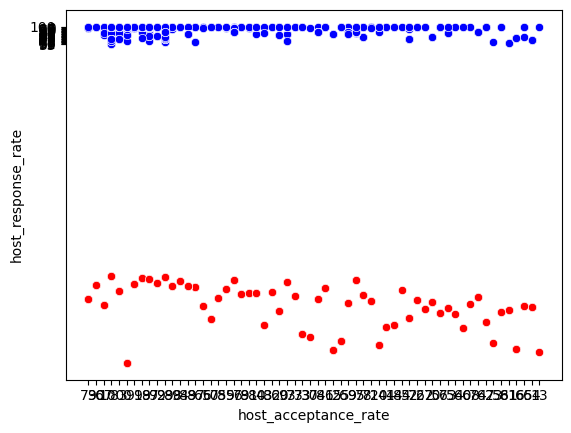

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado1[['host_acceptance_rate']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones1', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones1', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.0006379781398160311

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-163-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “host_acceptance_rate vs price” F2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado2[['host_acceptance_rate']]
Var_Dep= df_filtrado2['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.38559217]),
 'rank_': 1,
 'singular_': array([1772.83137194]),
 'intercept_': 536.7903907523971}

Modelo matemático: y= -1.38559217 x + 536.7903907523971

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0006379781398160311

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

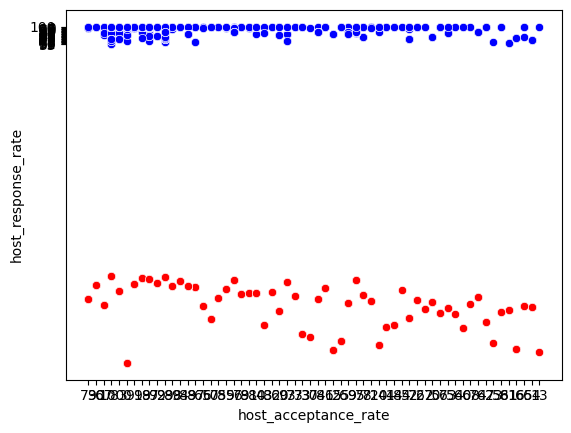

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado2[['host_acceptance_rate']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones2', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.0006379781398160311

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-169-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “host_acceptance_rate vs number_of_reviews” F1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado1[['host_acceptance_rate']]
Var_Dep= df_filtrado1['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.61092294]),
 'rank_': 1,
 'singular_': array([1772.83137194]),
 'intercept_': 9.101827782038278}

Modelo matemático: y= 0.61092294 x + 9.101827782038278

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.047605395563667274

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

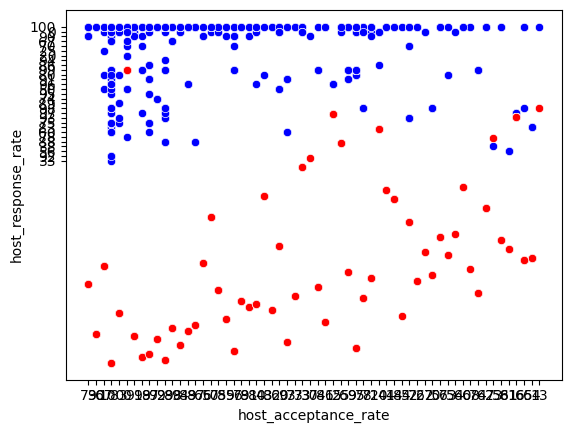

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado1[['host_acceptance_rate']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones3', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.047605395563667274

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-174-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “host_acceptance_rate vs number_of_reviews” F2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado2[['host_acceptance_rate']]
Var_Dep= df_filtrado2['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.61092294]),
 'rank_': 1,
 'singular_': array([1772.83137194]),
 'intercept_': 9.101827782038278}

Modelo matemático: y= 0.61092294 x + 9.101827782038278

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.047605395563667274

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

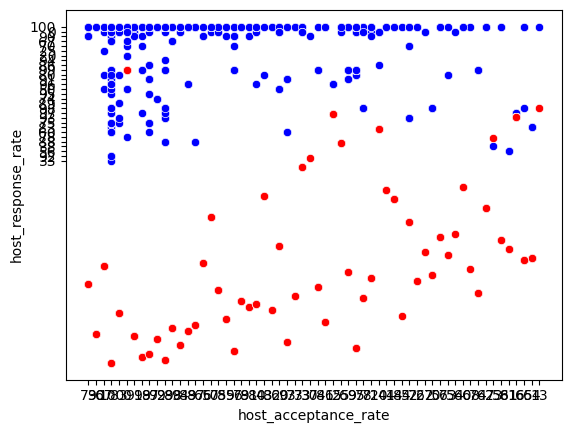

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado2[['host_acceptance_rate']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones4', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones4', color="red", data=df_filtrado1)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.047605395563667274

In [181]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-181-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “review_scores_location vs review_scores_cleanliness” F1

In [182]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado1[['review_scores_location']]
Var_Dep= df_filtrado1['review_scores_cleanliness']

In [183]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.97133682]),
 'rank_': 1,
 'singular_': array([92.09471523]),
 'intercept_': 0.07285165294829854}

Modelo matemático: y= 0.97133682 x + 0.07285165294829854

In [184]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.9506151120507869

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

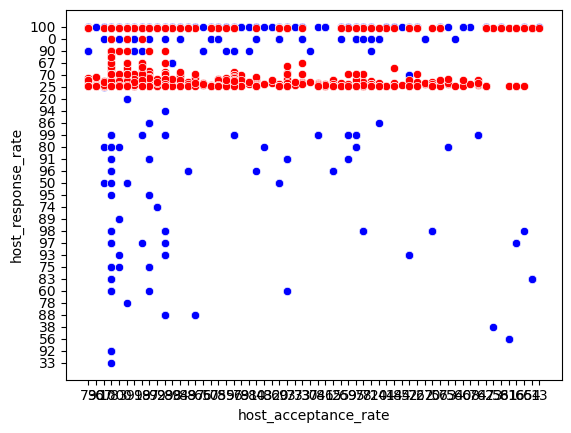

In [185]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado1[['review_scores_location']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones5', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones5', color="red", data=df_filtrado1)

In [186]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.9506151120507869

In [187]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-187-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## “review_scores_location vs review_scores_cleanliness” F2

In [188]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado2[['review_scores_location']]
Var_Dep= df_filtrado2['review_scores_cleanliness']

In [189]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.97133682]),
 'rank_': 1,
 'singular_': array([92.09471523]),
 'intercept_': 0.07285165294829854}

Modelo matemático: y= 0.97133682 x + 0.07285165294829854

In [190]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.9506151120507869

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

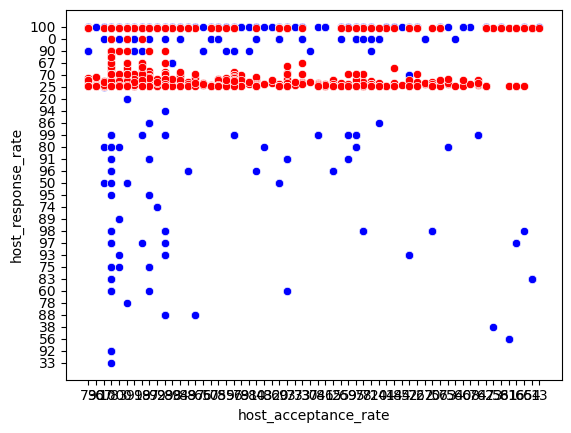

In [191]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado2[['review_scores_location']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones6', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones6', color="red", data=df_filtrado1)

In [192]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.9506151120507869

In [193]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-193-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


##"availability_365 vs number_of_reviews” F1

In [194]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado1[['availability_365']]
Var_Dep= df_filtrado1['number_of_reviews']

In [195]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00144445]),
 'rank_': 1,
 'singular_': array([6569.09513952]),
 'intercept_': 56.671966811004566}

Modelo matemático: y= -0.00144445 x + 56.671966811004566

In [196]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

3.6539619374664767e-06

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

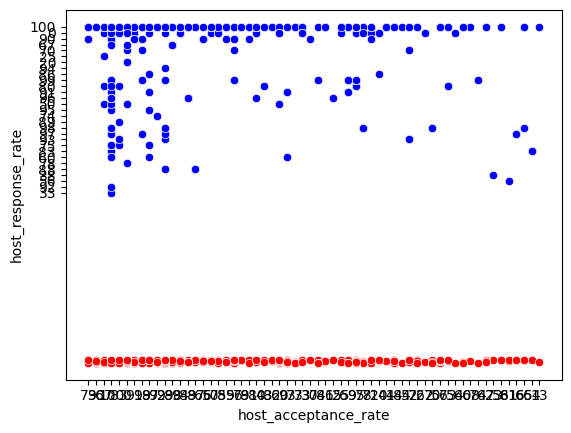

In [197]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado1[['availability_365']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones7', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones7', color="red", data=df_filtrado1)

In [198]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

3.6539619374664767e-06

In [199]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-199-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


##"availability_365 vs number_of_reviews” F2

In [200]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado2[['availability_365']]
Var_Dep= df_filtrado2['number_of_reviews']

In [201]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00144445]),
 'rank_': 1,
 'singular_': array([6569.09513952]),
 'intercept_': 56.671966811004566}

Modelo matemático: y= -0.00144445 x + 56.671966811004566

In [202]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

3.6539619374664767e-06

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

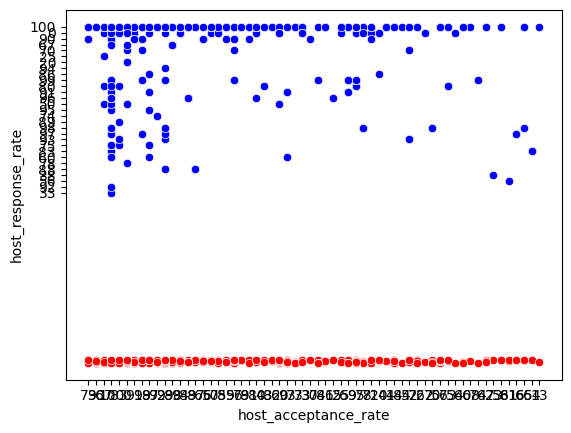

In [203]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado2[['availability_365']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones8', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones8', color="red", data=df_filtrado1)

In [204]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

3.6539619374664767e-06

In [205]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-205-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## "reviews_per_month vs review_scores_communication” F1

In [206]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado1[['reviews_per_month']]
Var_Dep= df_filtrado1['review_scores_communication']

In [207]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.26716222]),
 'rank_': 1,
 'singular_': array([101.22246683]),
 'intercept_': 3.5886302964317647}

Modelo matemático: y= 0.26716222 x + 3.5886302964317647

In [208]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.08436882675870583

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

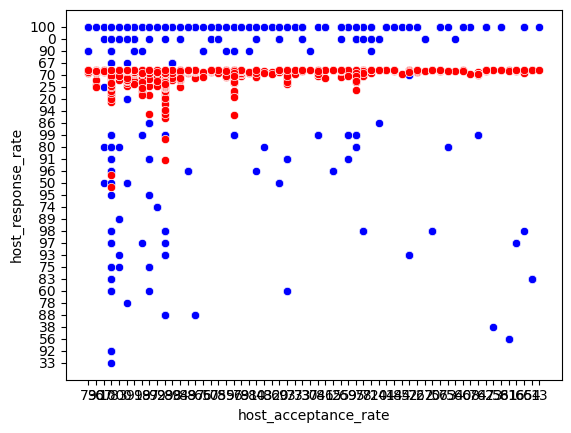

In [209]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado1[['reviews_per_month']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones9', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones9', color="red", data=df_filtrado1)

In [210]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.08436882675870583

In [211]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-211-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()


## "reviews_per_month vs review_scores_communication” F2

In [212]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_filtrado2[['reviews_per_month']]
Var_Dep= df_filtrado2['review_scores_communication']

In [213]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.26716222]),
 'rank_': 1,
 'singular_': array([101.22246683]),
 'intercept_': 3.5886302964317647}

Modelo matemático: y= 0.26716222 x + 3.5886302964317647

In [214]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.08436882675870583

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

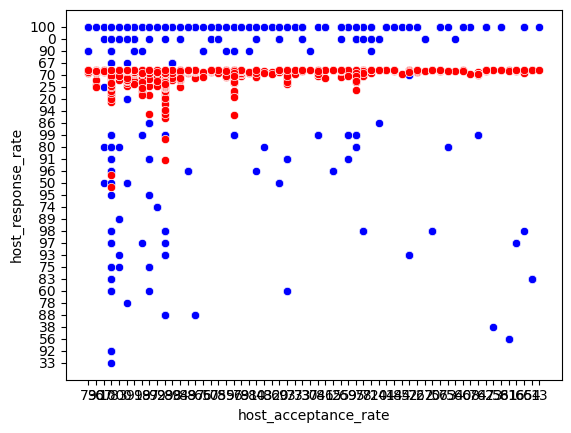

In [215]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred= model.predict(X=df_filtrado2[['reviews_per_month']])

#Insertamos la columna de predicciones en el DataFrame
df_filtrado1.insert(0, 'Predicciones10', y_pred)

#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df_filtrado1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones10', color="red", data=df_filtrado1)

In [216]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Determexroom=model.score(X=Vars_Indep, y=Var_Dep)
coef_Determexroom

0.08436882675870583

In [217]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Determexroom)

#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_filtrado1.corr()

#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)

<ipython-input-217-d08d55969f9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=df_filtrado1.corr()
